In [30]:

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torchvision.io.image")

import torch
import numpy as np


import torchvision
from torchvision import models

import torch.nn as nn

from skimage import io

import random
import time
import os.path


import matplotlib.pyplot as plt
from IPython.display import clear_output


from sklearn.metrics import accuracy_score
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score


import torch.optim as optim
import torch.optim.lr_scheduler
import torch.nn.init
from torch.autograd import Variable
from torch.optim.lr_scheduler import ReduceLROnPlateau


In [31]:
import sys
sys.path.append('../')
from src import *

In [32]:
data_folder = 'C:/dev/EuroSAT/'
root = os.path.join(data_folder, '2750/')

In [33]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [34]:
lr = 0.001             
num_epochs = 100      
milestones = [50,75,90]       

In [35]:

if __name__ == '__main__':
    torch.manual_seed(0)
    np.random.seed(0)
    torch.cuda.manual_seed(0)
    random.seed(0)
    
    print("pytorch version", torch.__version__)
    
    criteria = torch.nn.CrossEntropyLoss()
    resnet_model = Load_model(resnet_val=50, device = device)
    train_loader, val_loader = make_dataloaders(root, batch_size_val=128)
    
    resnet_model=resnet_model.to(device)
    
    optimizer = optim.Adam(resnet_model.parameters(), lr=lr, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)
    
    scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10, verbose=True)
    #scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=milestones, gamma=0.1)


pytorch version 2.1.2
Model Loaded


In [36]:
save_folder_addr = '../res50/'

if not os.path.exists(save_folder_addr):
    os.makedirs(save_folder_addr)

In [37]:
import hashlib

val_data_string = str(val_loader.dataset)
val_data_hash = hashlib.sha256(val_data_string.encode()).hexdigest()

with open(save_folder_addr + 'val_data_hash.txt', 'w') as file:
    file.write(val_data_hash)
    file.close()

print(val_data_hash)

9d88db83ba41e8065697aa09f96200cf0ca669b5dee3d565fb8205e6fdc147fd


Iteration Number 16760 4.376956224441528 seconds
Train (epoch 100/100) [128/168 (76%)]	Loss: 0.084208	Accuracy: 0.9609375	Learning Rate:1.0000000000000002e-06


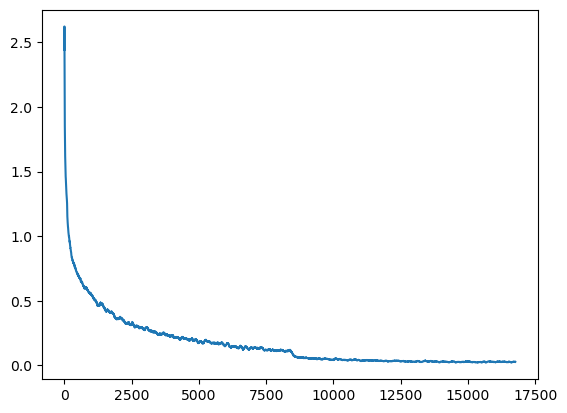

validation accuracy : 0.9540550595238095


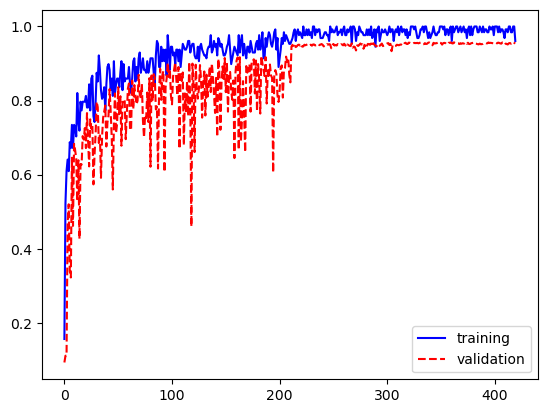

In [38]:
resnet_model = train(resnet_model, train_loader, val_loader, criteria, optimizer, num_epochs, scheduler, device = device, save_path=save_folder_addr)